In [50]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)
import matplotlib.pyplot as plt
import progressbar
import scipy

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [51]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py,progressbar,scipy

# date
print (" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas     : 1.2.0
keras      : 2.4.3
numpy      : 1.19.5
math       : unknown
tensorflow : 2.4.0
matplotlib : 3.3.3
h5py       : 2.10.0
progressbar: 2.5
scipy      : 1.6.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-41-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Tue Feb 02 2021 13:02:19CET



## Load of the data

In [52]:
from process import loaddata
class_data = loaddata("../data/classifier/250.csv")
regr_data = loaddata("../data/regression/250.csv")

In [53]:
class_data.shape

(334438, 11)

In [55]:
no_int = []
for row in class_data:
    if row[0] != 1:
        no_int.append([row[1], row[2], row[3], row[4], row[5], row[6], row[4], row[5], row[6], row[0]])
no_int = np.array(no_int)

In [56]:
interacted = []
for row in regr_data:
    interacted.append([row[0], row[1], row[2], row[3], row[4], row[5], row[-3], row[-2], row[-1], 1])
interacted = np.array(interacted)

In [57]:
data = np.concatenate((no_int, interacted), axis=0)

In [58]:
data.shape

(334438, 10)

In [59]:
np.random.shuffle(data)
y = data[:,-3:]
x = data[:,0:7]

In [78]:
x.shape

(334438, 7)

In [61]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 250828 
Valuation sample: 83610


In [62]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [63]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from keras import regularizers

In [81]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (7, activation = 'relu', kernel_initializer= "normal" , input_shape = x.shape))
    model.add (layers.Dense (14, activation = "relu"))
    model.add (layers.Dense (28, activation = "relu"))
    model.add (layers.Dense (14, activation = "relu"))
    model.add (layers.Dense (28, activation = "relu"))
    model.add (layers.Dense (14, activation = "relu"))
    model.add (layers.Dense (28, activation = "relu"))
    model.add (layers.Dense (14, activation = "relu"))
    model.add (layers.Dense (28, activation = "relu"))
    model.add (layers.Dense (14, activation = "relu"))
    model.add (layers.Dense (28, activation = "relu"))
    model.add (layers.Dense (14, activation = "relu"))
    model.add (layers.Dense (7, activation = "relu"))
    model.add (layers.Dense (14, activation = "relu"))
    model.add (layers.Dense (28, activation = "relu"))
    model.add (layers.Dense (14, activation = "relu"))
    model.add (layers.Dense (28, activation = "relu"))
    model.add (layers.Dense (14, activation = "relu"))
    model.add (layers.Dense (28, activation = "relu"))
    model.add (layers.Dense (14, activation = "relu"))
    model.add (layers.Dense (28, activation = "relu"))
    model.add (layers.Dense (14, activation = "relu"))
    model.add (layers.Dense (7, activation = "relu"))
    model.add (layers.Dense (3))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mape"])
    return model

In [85]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 20, batch_size = 20050, validation_data = (x_val, y_val) )
model.save("../models/classificationandregression/large_mse250.h5")

Epoch 1/20
13/13 [==============================] - 2s 46ms/step - loss: 0.1467 - mape: 12231845.6894 - val_loss: 0.0966 - val_mape: 56538832.0000
Epoch 2/20
13/13 [==============================] - 0s 31ms/step - loss: 0.0925 - mape: 67435010.5714 - val_loss: 0.0874 - val_mape: 77078856.0000
Epoch 3/20
13/13 [==============================] - 0s 31ms/step - loss: 0.0869 - mape: 78527305.7143 - val_loss: 0.0857 - val_mape: 85256920.0000
Epoch 4/20
13/13 [==============================] - 0s 34ms/step - loss: 0.0855 - mape: 81316609.1429 - val_loss: 0.0846 - val_mape: 80409896.0000
Epoch 5/20
13/13 [==============================] - 0s 35ms/step - loss: 0.0846 - mape: 82021394.8571 - val_loss: 0.0845 - val_mape: 86593240.0000
Epoch 6/20
13/13 [==============================] - 0s 30ms/step - loss: 0.0845 - mape: 83584606.2857 - val_loss: 0.0847 - val_mape: 78003928.0000
Epoch 7/20
13/13 [==============================] - 0s 32ms/step - loss: 0.0847 - mape: 82436949.1429 - val_loss: 0.08

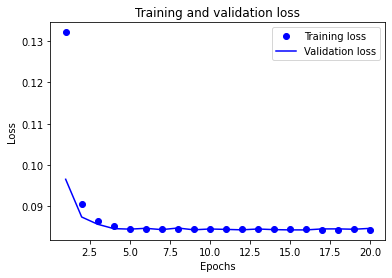

In [86]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Test spectrum

In [ ]:
from tensorflow import keras
model = keras.models.load_model('../models/classificationandregression/large_mse250.h5')

In [ ]:
model.summary()

In [ ]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step', density=True)
    plt.yscale("log")
    plt.show()

In [ ]:
y

In [ ]:
from tensorflow import keras 
photon_final_nn = []
prediction = model.predict(x)

In [ ]:
p1e_nn = prediction[:,0] 
p1e = y[:,0]
print(p1e_nn)
print(p1e)
plt.hist(p1e_nn, 60, alpha=0.5, label='NN prediction', density = True)
plt.hist(p1e, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Electron momentum x-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
#plt.xlim((0, 0.25))
plt.ylim((0, 12))
plt.show()

In [ ]:
p2e_nn = prediction[:,1] 
p2e = y[:,1]
print(p2e_nn)
print(p2e)
plt.hist(p2e_nn, 60, alpha=0.5, label='NN prediction', density = True)
plt.hist(p2e, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Electron momentum y-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
#plt.xlim((0, 0.25))
plt.ylim((0, 12))
plt.show()

In [ ]:
p3e_nn = prediction[:,2] 
p3e = y[:,2]
print(p3e_nn)
print(p3e)
plt.hist(p3e_nn, 100, alpha=0.5, label='NN prediction', density = True)
plt.hist(p3e, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Electron momentum z-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.ylim((0, 12))
plt.show()

In [ ]:
fig, axs = plt.subplots(3, sharex = True)
fig.suptitle('3-momentum electrons post interaction')
axs[0].hist(p1e_nn, 100, alpha=0.5, label='NN prediction', density = True)
axs[0].hist(p1e, 100, alpha=0.5, label='NN prediction', density = True)
axs[1].hist(p2e_nn, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
axs[1].hist(p2e, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
axs[2].hist(p3e_nn, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
axs[2].hist(p3e, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
fig.show()

In [ ]:
final_e = []
final_e_nn = []
for classi_ in class_data:
    final_e.append(np.linalg.norm(classi_[-7:-4]))

In [ ]:
from tensorflow import keras 
final_e_nn = []
threshold = 0.5
num = int(1*len(x))
bar = progressbar.ProgressBar(maxval=num, 
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                       progressbar.Percentage(), 
                                       " of {0}".format(num)])
bar.start()
for pred in prediction:
    final_e_nn.append(np.linalg.norm(pred))
bar.finish()

In [ ]:
energy_spectrum(final_e, 75)

In [ ]:
energy_spectrum(final_e_nn, 75)

In [ ]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

mean,std=norm.fit(final_e)
plt.hist(final_e, bins=100, alpha = 0.5, label='NN prediction', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,'r--', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [ ]:
print('mean = ', mean)
print('std = ', std)
print("chi square = ", stats.chisquare(final_e))

In [ ]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

mean_nn,std_nn=norm.fit(final_e_nn)
plt.hist(final_e_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean_nn, std_nn)
plt.plot(x, y,'r--', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [ ]:
print('mean = ', mean_nn)
print('std = ', std_nn)
print("chi square = ", stats.chisquare(final_e_nn))

In [ ]:
plt.hist(final_e_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
plt.hist(final_e, bins=100, alpha = 0.5, label='Electron Momentum from simulations', density = True)
x_nn = np.linspace(xmin, xmax, 100)
y_nn = norm.pdf(x_nn, mean_nn, std_nn)
plt.plot(x_nn, y_nn,'r--', label = 'fit NN', linewidth = 2)
plt.legend(loc='upper right')
x_e = np.linspace(xmin, xmax, 100)
y_e = norm.pdf(x_e, mean, std)
plt.plot(x_e, y_e, 'g:', label = 'fit Electron Momentum Simulations', linewidth = 2)
plt.legend(loc = 'upper right')
plt.ylim((0, 30))
plt.savefig('Fit_250train_250test.png')
plt.show()